In [4]:
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from scipy.stats import ttest_rel
from scipy.stats import sem
from RZutilpy.figure import bar, plot, default_img_set, colorpalettable
default_img_set()
import pingouin

In [5]:
subjects = 22 # 22 subjects
regions = 7 # 7 brain regions

# Load data
with open('../Metrics_fMRI.pkl', 'rb') as f:
    Metrics = pickle.load(f)

idx = np.array([3, 5]) # V3a and hMT+ regions

df_abs_pre = Metrics["df_abs_pre"][:,idx]
df_abs_post = Metrics["df_abs_post"][:,idx]
variance_pre = Metrics["variance_pre"][:,idx]
variance_post = Metrics["variance_post"][:,idx]
LFI_pre = Metrics["LFI_pre"]
LFI_post = Metrics["LFI_post"]
correlation_pre = Metrics["correlation_pre"][:,idx]
correlation_post = Metrics["correlation_post"][:,idx]
decoding_acc_pre = Metrics["decoding_acc_pre"]
decoding_acc_post = Metrics["decoding_acc_post"]
rotation  = Metrics["rotation"][:,idx]
PCA_LFI = Metrics["PCA_LFI"][:, idx, :]

In [6]:
sigstrength_mean = np.vstack((df_abs_pre.mean(axis=0),df_abs_post.mean(axis=0)))
sigstrength_se = np.vstack((sem(df_abs_pre,axis=0),sem(df_abs_post,axis=0)))

variance_mean = np.vstack((variance_pre.mean(axis=0),variance_post.mean(axis=0)))
variance_se = np.vstack((sem(variance_pre, axis=0),sem(variance_post, axis=0)))

correlation_mean = np.vstack((correlation_pre.mean(axis=0),correlation_post.mean(axis=0)))
correlation_se = np.vstack((sem(correlation_pre, axis=0),sem(correlation_post, axis=0)))

rotation_mean = rotation.mean(axis=0)
rotation_sem = sem(rotation, axis=0)

PCA_LFI_mean = PCA_LFI.mean(axis=0)
PCA_LFI_sem = sem(PCA_LFI, axis=0)

PCA_rotation = np.array([[i[3], i[5]] for i in Metrics['PCA_rotation']])
PCA_rotation_mean = PCA_rotation.mean(axis=0)
PCA_rotation_sem = sem(PCA_rotation,axis=0)
PCA_abs_pre = np.array([[i[3], i[5]] for i in Metrics['PC_abs_pre']])
PCA_abs_post = np.array([[i[3], i[5]] for i in Metrics['PC_abs_post']])
PCA_abs_pre_mean = np.mean(PCA_abs_pre, axis=0)
PCA_abs_pre_sem = sem(PCA_abs_pre, axis=0)
PCA_abs_post_mean = np.mean(PCA_abs_post, axis=0)
PCA_abs_post_sem = sem(PCA_abs_post, axis=0)

In [7]:
ryzcolor = colorpalettable('ryz1')
C0, C1, C0_alpha, C1_alpha = np.array(ryzcolor(0)), np.array(ryzcolor(1)),np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3

2
2
2


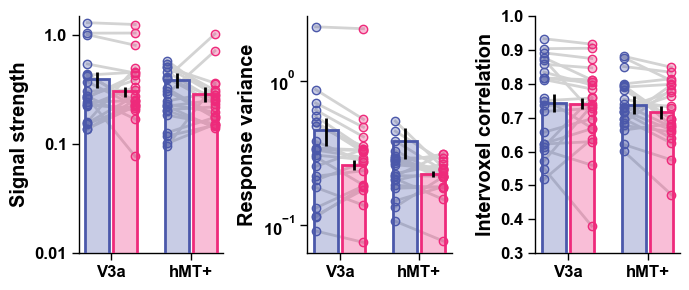

In [13]:
barwidth = 0.3

fig, ax = plt.subplots(1, 3, figsize=(7, 3))

deltax=0.3

# Signal strength
plt.sca(ax[0])
#draw line
plot(np.array([0-deltax, 0+deltax]), np.vstack((df_abs_pre[:,0],df_abs_post[:,0])), fmt='-', color='lightgray')
plot(np.array([1-deltax, 1+deltax]), np.vstack((df_abs_pre[:,1],df_abs_post[:,1])), fmt='-', color='lightgray')
#draw dots
plot([0-deltax]*subjects, df_abs_pre[:,0], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([0+deltax]*subjects, df_abs_post[:,0], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
plot([1-deltax]*subjects, df_abs_pre[:,1], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*subjects, df_abs_post[:,1], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
#draw bar
patch, _= bar(np.arange(2), sigstrength_mean, yerr=sigstrength_se, ecolor='k', width=barwidth,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)], linewidth=2, bargap=0.05, zorder=10)
ax[0].set_yscale("log")
ax[0].set_yticks([0.01, 0.1, 1.0])
ax[0].set_yticklabels([0.01, 0.1, 1.0])
# ax[0].set_xlim([0.7, 1.3])
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["V3a", "hMT+"])
ax[0].set_ylabel('Signal strength')
ax[0].minorticks_off()


# Variance
plt.sca(ax[1])
plot(np.array([0-deltax, 0+deltax]), np.vstack((variance_pre[:,0],variance_post[:,0])), fmt='-', color='lightgray')
plot(np.array([1-deltax, 1+deltax]), np.vstack((variance_pre[:,1],variance_post[:,1])), fmt='-', color='lightgray')
plot([0-deltax]*subjects, variance_pre[:,0], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([0+deltax]*subjects, variance_post[:,0], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
plot([1-deltax]*subjects, variance_pre[:,1], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*subjects, variance_post[:,1], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)

patch, _= bar(np.arange(2), variance_mean, yerr=variance_se, width=barwidth, ecolor='k', facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)], linewidth=2, bargap=0.05,zorder=10)

ax[1].set_yscale("log")
# ax[1].set_ylim([0.0, 0.8])
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["V3a", "hMT+"])
ax[1].set_ylabel('Response variance')
ax[1].minorticks_off()


# Inter-voxel correlation
plt.sca(ax[2])
plot(np.array([0-deltax, 0+deltax]), np.vstack((correlation_pre[:,0],correlation_post[:,0])), fmt='-', color='lightgray')
plot(np.array([1-deltax, 1+deltax]), np.vstack((correlation_pre[:,1],correlation_post[:,1])), fmt='-', color='lightgray')
plot([0-deltax]*subjects, correlation_pre[:,0], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([0+deltax]*subjects, correlation_post[:,0], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
plot([1-deltax]*subjects, correlation_pre[:,1], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([1+deltax]*subjects, correlation_post[:,1], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)

patch,_=bar(np.arange(2), correlation_mean, yerr=correlation_se, ecolor='k', width=barwidth,facecolor=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)], linewidth=2, bargap=0.05,zorder=10)
ax[2].set_ylim([0.3, 1.0])
ax[2].set_xticks([0, 1])
ax[2].set_xticklabels(["V3a", "hMT+"])
ax[2].set_ylabel('Intervoxel correlation')

plt.savefig('Fig8_1.pdf')

In [13]:
print(ttest_rel(df_abs_pre, df_abs_post, alternative='less'))
print(ttest_rel(variance_pre, variance_post, alternative='greater'))
print(ttest_rel(correlation_pre, correlation_post, alternative='greater'))

# compute effect size for each metric
for i in range(2):
    print(pingouin.compute_effsize(df_abs_pre[:,i], df_abs_post[:,i], paired=True, eftype='cohen'))
    print(pingouin.compute_effsize(variance_pre[:,i], variance_post[:,i], paired=True, eftype='cohen'))
    print(pingouin.compute_effsize(correlation_pre[:,i], correlation_post[:,i], paired=True, eftype='cohen'))



TtestResult(statistic=array([0.06617763, 0.36181042]), pvalue=array([0.5260688 , 0.63944558]), df=array([21, 21]))
TtestResult(statistic=array([2.87574227, 1.96949649]), pvalue=array([0.00452391, 0.03111482]), df=array([21, 21]))
TtestResult(statistic=array([0.28932075, 1.90044031]), pvalue=array([0.3875865 , 0.03559577]), df=array([21, 21]))
0.006465616115351722
0.15784519911442108
0.03969957443408085
0.09263324610983151
0.45707700857915895
0.3089661334722636


1


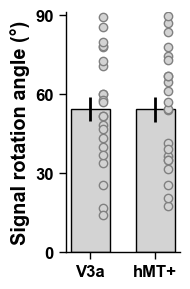

In [14]:
# Signal rotation angle 
fig = plt.figure(figsize=(2,3))
ax = plt.gca()
plot(np.array([0.1]), rotation[:,0:1].T, marker='o', markeredgecolor='gray', markerfacecolor='lightgray')
plot(np.array([0.6]), rotation[:,1:2].T, marker='o', markeredgecolor='gray', markerfacecolor='lightgray')
patch,_=bar(np.array([0, 0.5]), rotation_mean, yerr=rotation_sem, width=0.3, edgecolor='k', facecolor='lightgray', ecolor='k')
ax.set_ylim([0, 91])
ax.set_yticks([0, 30, 60, 90])
ax.set_ylabel('Signal rotation angle (°)')
ax.set_xticks([0, 0.5])
ax.set_xticklabels(["V3a", "hMT+"])

plt.savefig('Fig8_2.pdf')

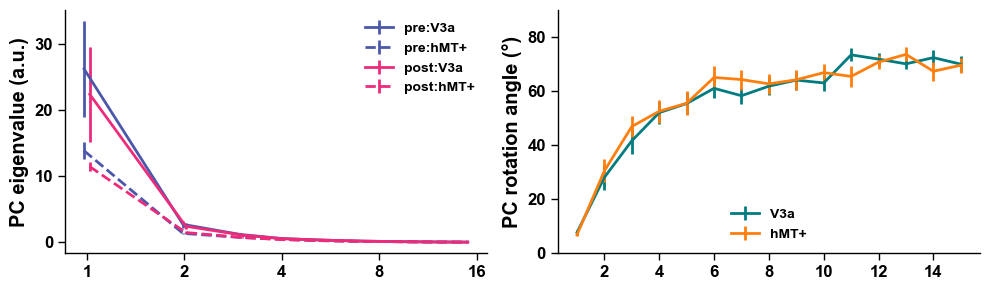

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

plt.sca(ax[0])
plot(np.arange(1,16)-0.02, PCA_abs_pre_mean[:,:15].T, PCA_abs_pre_sem[:,:15].T, fmt=['-','--'], color=[C0, C0],label=['pre:V3a', 'pre:hMT+'])
plot(np.arange(1,16)+0.02, PCA_abs_post_mean[:,:15].T, PCA_abs_post_sem[:,:15].T, fmt=['-','--'],color=[C1, C1],label=['post:V3a', 'post:hMT+'])
plt.ylabel('PC eigenvalue (a.u.)')
ax[0].set_xscale("log")
ax[0].set_xticks([1, 2, 4, 8, 16])
ax[0].set_xticklabels([1, 2, 4, 8, 16])
ax[0].legend(loc = "upper right")
ax[0].minorticks_off()


plt.sca(ax[1])
plot(np.arange(1,16), PCA_rotation_mean[:,:15].T, PCA_rotation_sem[:,:15].T,  label=['V3a', 'hMT+'],color=['#007C80', '#FF7F0E'])
plt.ylabel('PC rotation angle (°)')
ax[1].legend(loc = "lower center")
ax[1].set_ylim([0, 90])

plt.savefig('Fig8_3.pdf')


4
4


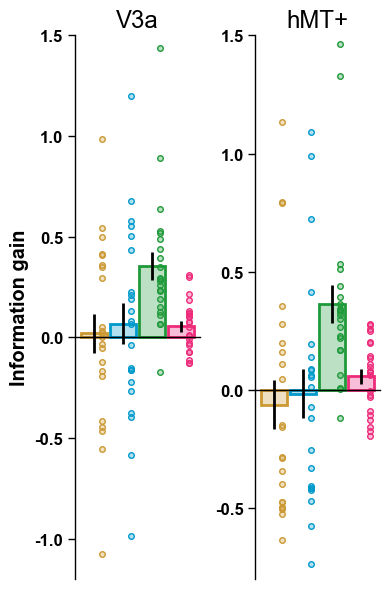

In [16]:
ryzcolor = colorpalettable('ryz1')
C0, C1, C0_alpha, C1_alpha = np.array(ryzcolor(0)), np.array(ryzcolor(1)),np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3
Clist = [np.array(ryzcolor(2)), np.array(ryzcolor(3)), np.array([0.121, 0.6039, 0.227]), np.array(ryzcolor(1))]
Calphalist = [np.array(ryzcolor(2)), np.array(ryzcolor(3)), np.array([0.121, 0.6039, 0.227, 1.0]), np.array(ryzcolor(1))]
Calphalist[0][-1]=0.3
Calphalist[1][-1]=0.3
Calphalist[2][-1]=0.3
Calphalist[3][-1]=0.3

fig, ax=plt.subplots(1,2, figsize=(4,6))

plt.sca(ax[0])
plot([0.655]*subjects, PCA_LFI[:,0, 0], fmt='o', markerfacecolor=Calphalist[0], markeredgecolor=Clist[0], ms=4)
plot([0.935]*subjects, PCA_LFI[:,0, 1], fmt='o', markerfacecolor=Calphalist[1], markeredgecolor=Clist[1], ms=4)
plot([1.215]*subjects, PCA_LFI[:,0, 2], fmt='o', markerfacecolor=Calphalist[2], markeredgecolor=Clist[2], ms=4)
plot([1.500]*subjects, PCA_LFI[:,0, 3], fmt='o', markerfacecolor=Calphalist[3], markeredgecolor=Clist[3], ms=4)
# Draw Mean and SEM
bh=bar(1, PCA_LFI_mean[0][None,:], yerr=PCA_LFI_sem[0][None,:], bargap=0.03, ecolor='k', color=Calphalist, edgecolor=Clist, linewidth=2)
ax[0].set_ylabel('Information gain')
ax[0].set_ylim([-1.2, 1.5])
ax[0].set_xticks([])
ax[0].spines['bottom'].set_position(('data', 0))
ax[0].set_title("V3a")

plt.sca(ax[1])
plot([0.655]*subjects, PCA_LFI[:,1, 0], fmt='o', markerfacecolor=Calphalist[0], markeredgecolor=Clist[0], ms=4)
plot([0.935]*subjects, PCA_LFI[:,1, 1], fmt='o', markerfacecolor=Calphalist[1], markeredgecolor=Clist[1], ms=4)
plot([1.215]*subjects, PCA_LFI[:,1, 2], fmt='o', markerfacecolor=Calphalist[2], markeredgecolor=Clist[2], ms=4)
plot([1.500]*subjects, PCA_LFI[:,1, 3], fmt='o', markerfacecolor=Calphalist[3], markeredgecolor=Clist[3], ms=4)
# Draw Mean and SEM
bh=bar(1, PCA_LFI_mean[1][None,:], yerr=PCA_LFI_sem[1][None,:], bargap=0.03, ecolor='k', color=Calphalist, edgecolor=Clist, linewidth=2)
ax[1].set_ylim([-0.8, 1.5])
ax[1].set_xticks([])
ax[1].spines['bottom'].set_position(('data', 0))
ax[1].set_title("hMT+")

plt.savefig('Fig8_4.pdf')